# Prepare dataset
The purpose of this file is to normalize dataset to have same size along the whole dataset in one run. 
This code finds all files from the directory and cuts each of them into smaller pieces of same *length*, optionally with a *stride*. If the  piece of a file is shorter than a *length* but still longer than a *minimum length treshold* zeroes at the end of a file are padded (to make the size equal to *length*).

To-do list

**Part 1**
* [x] find all files in the directory
* [x] prepare a strategy how to cut files: user gives file length in seconds, but we oparate on array indexes
* [x] cut sound into pieces 
* [x] apply melspectrogram
* [x] save files

**Part 2**
* [ ] Prepare test, validation and training sets with k-fold validation

## Create list of all files to cut

In [1]:
# find all of the files in the directory
import os


birds=[] # list of all birds
for root, dirs, files in os.walk("../data/xeno-canto-dataset/"):
    if root == "../data/xeno-canto-dataset/":
        birds=dirs
                
flist=[] # list of all files
blist=[] # list of files for one bird 
for bird in birds:
    for root, dirs, files in os.walk("../data/xeno-canto-dataset/"+bird):
        for file in files:
            if file.endswith(".mp3"):
                blist.append(os.path.join(root, file))
    print("Found ", len(blist), ' files for ', bird)
    flist.append(blist)
    blist=[]
    

Found  154  files for  AcrocephalusArundinaceus
Found  310  files for  PhylloscopusCollybita
Found  326  files for  EmberizaCitrinella
Found  566  files for  SylviaAtricapilla
Found  414  files for  ParusMajor


## Find strategy to cut the file
We want to cut files to smaller pieces of the desired size (5 seconds in example), and stride of 1 second. Stride tells us how different pieces of files will overlap at each other.

In [2]:
def saveMel(signal, directory):
    # MK_spectrogram modified
    N_FFT = 1024         # 
    HOP_SIZE = 1024      #  
    N_MELS = 128          # Higher   
    WIN_SIZE = 1024      # 
    WINDOW_TYPE = 'hann' # 
    FEATURE = 'mel'      # 
    FMIN = 1400

    fig = plt.figure(frameon=False)
    fig.set_size_inches(6,6)

    ax = plt.Axes(fig, [0., 0., 1., 1.])
    ax.set_axis_off()
    fig.add_axes(ax)

    S = librosa.feature.melspectrogram(y=signal, sr=sr,
                                        n_fft=N_FFT,
                                        hop_length=HOP_SIZE, 
                                        n_mels=N_MELS, 
                                        htk=True, 
                                        fmin=FMIN, # higher limit ##high-pass filter freq.
                                        fmax=sr/2) # AMPLITUDE
    librosa.display.specshow(librosa.power_to_db(S**2,ref=np.max), fmin=FMIN) #power = S**2

    fig.savefig(directory)
    plt.close('all')

In [3]:
import warnings
warnings.filterwarnings('ignore')

import sys
from tqdm import tqdm_notebook as tqdm
import librosa
import librosa.display
import numpy as np
import matplotlib.pyplot as plt

size = {'desired': 5, # [seconds]
        'minimum': 4, # [seconds]
        'stride' : 0, # [seconds]
        'name': 5 # [number of letters]
       } # stride should not be bigger than desired length

print('Number of directories to check and cut: ', len(flist))

#step = (size['desired']-size['stride'])*sr # length of step between two cuts in seconds
step=1
if step>0:
    for bird, birdList in enumerate(flist):
        print("Processing ", birds[bird], "...")
        for path in tqdm(birdList):
            # load the mp3 file
            directory="../data/mels/"+birds[bird][:size['name']]+"/"

            if not os.path.exists(directory):
                os.makedirs(directory)
                
            if not os.path.exists(directory+path.rsplit('/',1)[1].replace(' ', '')[:-4]+"1_1.png"):
                  
                signal, sr = librosa.load(path) # sr = sampling rate
                step = (size['desired']-size['stride'])*sr # length of step between two cuts in seconds
                
                nr=0;
                for start, end in zip(range(0,len(signal),step),range(size['desired']*sr,len(signal),step)):
                    # cut file and save each piece
                    nr=nr+1
                    # save the file if its length is higher than minimum
                    if end-start > size['minimum']*sr:
                        melpath=path.rsplit('/',1)[1]
                        melpath=directory+melpath.replace(' ', '')[:-4]+str(nr)+"_"+str(nr)+".png"
                        saveMel(signal[start:end],melpath)
                    #print('New file...',start/sr,' - ',end/sr)
                    #print('Start: ',start,'end: ', end, 'length: ', end-start)
                
            pass
else:    
    print("Error: Stride should be lower than desired length.")
    
print('Number of files after cutting: ')


Number of directories to check and cut:  5
Processing  AcrocephalusArundinaceus ...



Processing  PhylloscopusCollybita ...



Processing  EmberizaCitrinella ...



Processing  SylviaAtricapilla ...



Processing  ParusMajor ...



Number of files after cutting: 


['Ember', 'Phyll', 'Acroc', 'Parus', 'Sylvi']
[]
[]
[]
[]
[]


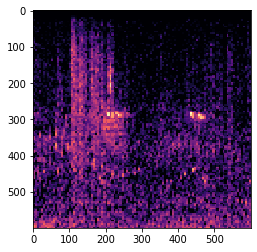

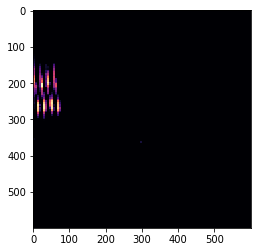

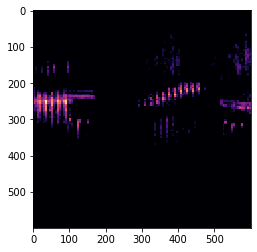

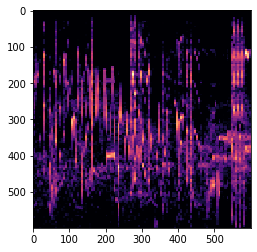

Found  48158  files


In [8]:
# Test
import matplotlib.image as mpimg
ilist=[]
for root, dirs, files in os.walk("../data/mels/"):
    print(dirs)
    for file in files:
        if file.endswith(".png"):
            ilist.append(os.path.join(root, file))
img=mpimg.imread(ilist[0])
imgplot = plt.imshow(img)
plt.show()
img=mpimg.imread(ilist[100])
imgplot = plt.imshow(img)
plt.show()
img=mpimg.imread(ilist[1000])
imgplot = plt.imshow(img)
plt.show()
img=mpimg.imread(ilist[40000])
imgplot = plt.imshow(img)
plt.show()
print("Found ",len(ilist)," files")